## Dekorator (*ang. Decorator*)

**Typ**: strukturalny  
**Zakres**: obiektowy  
**Inna nazwa**: Wrapper (*ang. Wrapper*)

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>dekorator</b> dynamicznie dodaje obiektowi nowe obowiązki. Dekoratory stanowią elastyczną alternatywę dla dziedziczenia w zakresie rozszerzania funkcjonalności.
</div>

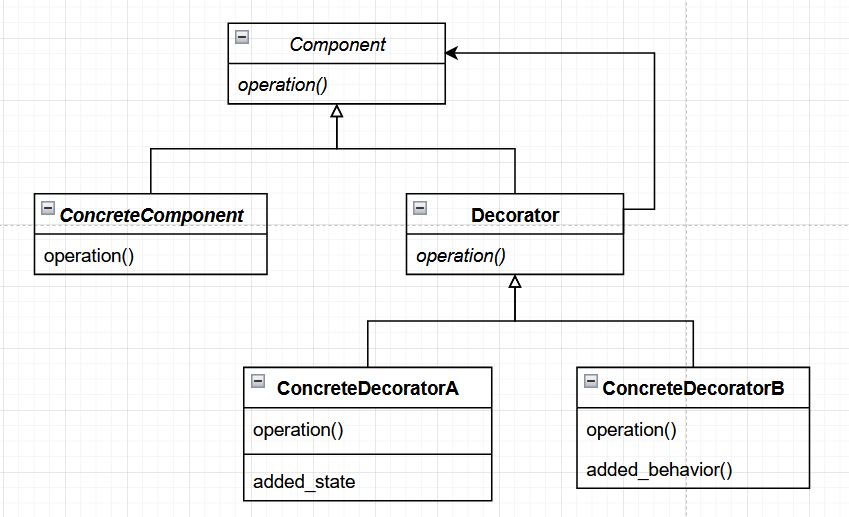

**Zwróć uwagę!**  
Dekorator jednocześnie **dziedziczy** po komponenecie i **komponuje** się z komponentu.

### Problem - eksplozja klas przez dziedziczenie

Mamy kawiarnię i serwujemy kilka kaw. 

In [ ]:
def HouseBlend(Beverage):
    def cost():
        return 25.40

    def description(self):
        return "Kawa domowa"
        
def DarkRoast(Beverage):
    def cost():
        return 22.20

    def description(self):
        return "Kawa mocno palona"
        
def Decaf(Beverage):
    def cost():
        return 24.10

    def description(self):
        return "Kawa bezkofeinowa"
        
def Espresso(Beverage):
    def cost():
        return 24.10

    def description(self):
        return "Espresso"
        

Ale klienci mogą dodawać do niej różne dodatki: mleko, czekoladę, karmel. 

Jak to zaprojektować?

### Naiwne podejście - dziedziczenie dla każdej kombinacji

In [ ]:
class Coffee:
    def cost(self):
        return 5.0
    
    def description(self):
        return "Kawa"


class CoffeeWithMilk(Coffee):
    def cost(self):
        return 7.0
    
    def description(self):
        return "Kawa z mlekiem"


class CoffeeWithChocolate(Coffee):
    def cost(self):
        return 8.0
    
    def description(self):
        return "Kawa z czekoladą"


class CoffeeWithMilkAndChocolate(Coffee):
    def cost(self):
        return 10.0
    
    def description(self):
        return "Kawa z mlekiem i czekoladą"

# ... i tak dalej dla każdej kombinacji!

In [ ]:
coffee = CoffeeWithMilkAndChocolate()
print(f"{coffee.description()}: {coffee.cost()} zł")

**Problemy:**

- **Eksplozja kombinacji:** 2^n klas dla n dodatków

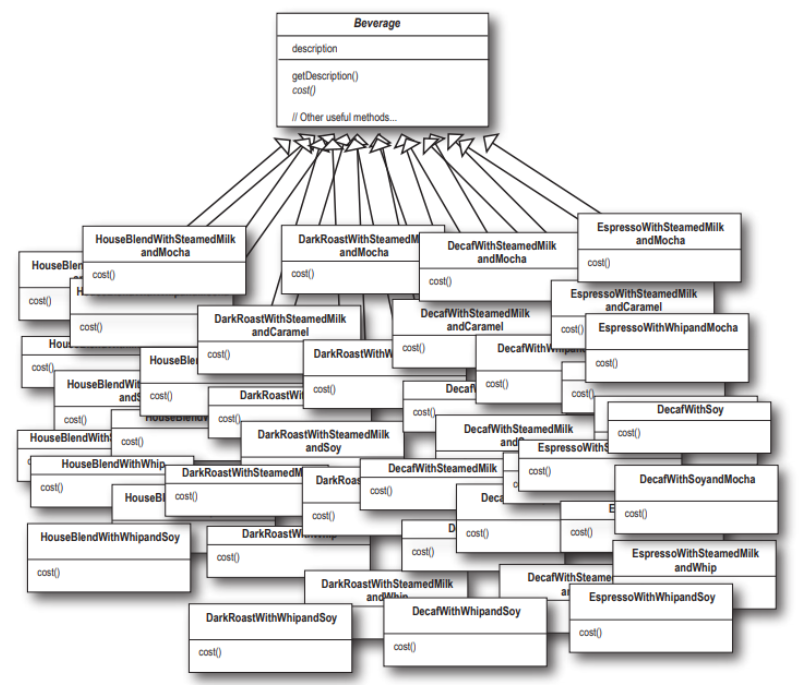

- Co jeśli klient chce **podwójne mleko**? Kolejna klasa?
- **Nie można dodawać** dodatków dynamicznie w runtime

### Rozwiązanie - Dekorator

**Idea:** Zamiast dziedziczenia, **owijamy** obiekt w inne obiekty (dekoratory), które dodają funkcjonalność.

### Krok 1: Wspólny interfejs

In [ ]:
from abc import ABC, abstractmethod

# Wspólny interfejs dla kawy i dekoratorów
class Beverage(ABC):
    @abstractmethod
    def cost(self) -> float:
        pass
    
    @abstractmethod
    def description(self) -> str:
        pass

### Krok 2: Podstawowy komponent (kawa)

Kawa implementuje **wspólny** interfejs

In [ ]:
class Coffee(Beverage):
    def cost(self) -> float:
        return 5.0
    
    def description(self) -> str:
        return "Kawa"

### Krok 3: Abstrakcyjny dekorator

Dekorator też implementuje **wspólny** interfejs

In [ ]:
class AddOnDecorator(Beverage):
    """Abstrakcyjny dekorator - opakowuje Beverage"""
    def __init__(self, beverage: Beverage):
        self.beverage = beverage  # Opakowujemy obiekt
    
    @abstractmethod
    def cost(self) -> float:
        pass
    
    @abstractmethod
    def description(self) -> str:
        pass

### Krok 4: Konkretne dekoratory (dodatki)

Konkretne dekoratory dziedziczą po abstrakcyjnym dekoratorze

In [ ]:
class Milk(AddOnDecorator):
    def cost(self) -> float:
        return self.beverage.cost() + 2.0  # Dodaje do ceny
    
    def description(self) -> str:
        return self.beverage.description() + " + mleko"  # Rozszerza opis


class Chocolate(AddOnDecorator):
    def cost(self) -> float:
        return self.beverage.cost() + 3.0
    
    def description(self) -> str:
        return self.beverage.description() + " + czekolada"


class Caramel(AddOnDecorator):
    def cost(self) -> float:
        return self.beverage.cost() + 2.5
    
    def description(self) -> str:
        return self.beverage.description() + " + karmel"

### Krok 5: Użycie - owijanie w dekoratory

In [ ]:
# Zwykła kawa
coffee = Coffee()
print(f"{coffee.description()}: {coffee.cost()} zł")

# Kawa z mlekiem (owija Coffee w Milk)
coffee = Coffee()
coffee = Milk(coffee)  # Owijamy (dzięki temu, że nasze wszystkie dekorator dziedziczą po Beverage one też są "napojami" i możemy je dalej owijać)
print(f"{coffee.description()}: {coffee.cost()} zł")

# Kawa z mlekiem i czekoladą (podwójne owijanie)
coffee = Coffee()
coffee = Milk(coffee)       # Pierwsze owinięcie
coffee = Chocolate(coffee)  # Drugie owinięcie
print(f"{coffee.description()}: {coffee.cost()} zł")

# Kawa z podwójnym mlekiem i karmelem!
coffee = Coffee()
coffee = Milk(coffee)
coffee = Milk(coffee)    # Podwójne mleko!
coffee = Caramel(coffee)
print(f"{coffee.description()}: {coffee.cost()} zł")

**Zalety:**
- ✅ **Tylko 4 klasy** (Coffee + 3 dodatki) zamiast 8!
- ✅ **Dowolne kombinacje** - owijamy ile chcemy
- ✅ **Podwójne dodatki** - po prostu owijamy dwa razy
- ✅ **Dynamiczne dodawanie** funkcjonalności w runtime
- ✅ **Dodanie nowego dodatku** - tylko 1 nowa klasa

## Jak to działa? - wizualizacja owijania

In [ ]:
# Zwykła kawa
coffee = Coffee()
print(f"{coffee.description()}: {coffee.cost()} zł")

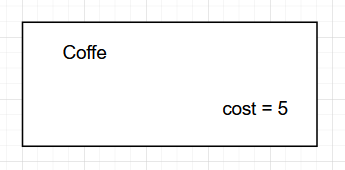

In [ ]:
# Kawa z mlekiem (owija Coffee w Milk)
coffee = Coffee()
coffee = Milk(coffee)  # Owijamy (dzięki temu, że nasze wszystkie dekorator dziedziczą po Beverage one też są "napojami" i możemy je dalej owijać)
print(f"{coffee.description()}: {coffee.cost()} zł")

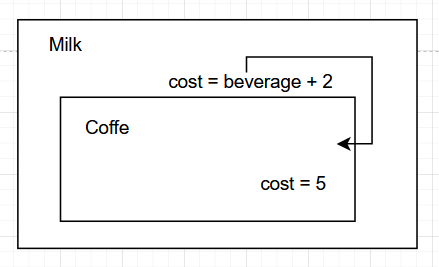

In [ ]:
# Kawa z mlekiem i czekoladą (podwójne owijanie)
coffee = Coffee()
coffee = Milk(coffee)       # Pierwsze owinięcie
coffee = Chocolate(coffee)  # Drugie owinięcie
print(f"{coffee.description()}: {coffee.cost()} zł")

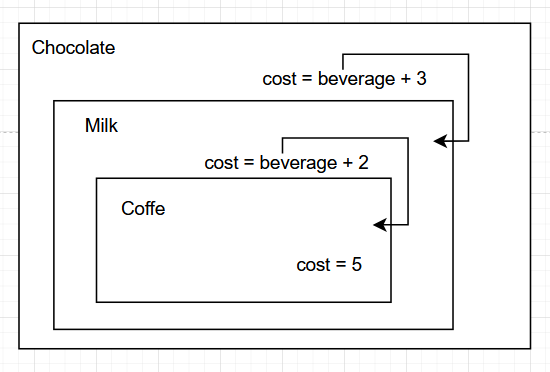

## Struktura wzorca

**Elementy wzorca Dekorator:**

1. **Component** - `Beverage`
   - Interfejs dla obiektów, które mogą być dekorowane

2. **ConcreteComponent** - `Coffee`
   - Podstawowy obiekt, do którego dodajemy funkcjonalność

3. **Decorator** - `AddOnDecorator`
   - Abstrakcyjna klasa dekoratora
   - Zawiera referencję do Component
   - Implementuje ten sam interfejs co Component

4. **ConcreteDecorator** - `Milk`, `Chocolate`, `Caramel`
   - Konkretne dekoratory
   - Dodają dodatkową funkcjonalność
   - Delegują wywołanie do opakowywanego obiektu

## Przykład 2 - Formatowanie tekstu

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Component
# ════════════════════════════════════════════════════════════
class Text(ABC):
    @abstractmethod
    def render(self) -> str:
        pass


# ════════════════════════════════════════════════════════════
# ConcreteComponent
# ════════════════════════════════════════════════════════════
class PlainText(Text):
    def __init__(self, text: str):
        self.text = text
    
    def render(self) -> str:
        return self.text


# ════════════════════════════════════════════════════════════
# Decorator
# ════════════════════════════════════════════════════════════
class TextDecorator(Text):
    def __init__(self, text: Text):
        self.text = text
    
    @abstractmethod
    def render(self) -> str:
        pass


# ════════════════════════════════════════════════════════════
# ConcreteDecorators
# ════════════════════════════════════════════════════════════
class BoldDecorator(TextDecorator):
    def render(self) -> str:
        return f"<b>{self.text.render()}</b>"


class ItalicDecorator(TextDecorator):
    def render(self) -> str:
        return f"<i>{self.text.render()}</i>"


class UnderlineDecorator(TextDecorator):
    def render(self) -> str:
        return f"<u>{self.text.render()}</u>"


# ════════════════════════════════════════════════════════════
# Użycie
# ════════════════════════════════════════════════════════════
text = PlainText("Hello World")
print(text.render())

# Pogrubienie
text = PlainText("Hello World")
text = BoldDecorator(text)
print(text.render())

# Pogrubienie + kursywa
text = PlainText("Hello World")
text = BoldDecorator(text)
text = ItalicDecorator(text)
print(text.render())

# Wszystkie formatowania
text = PlainText("Hello World")
text = BoldDecorator(text)
text = ItalicDecorator(text)
text = UnderlineDecorator(text)
print(text.render())

## Kiedy używać wzorca Dekorator?

Wzorzec Dekorator stosuj gdy:

1. **Chcesz dynamicznie dodawać obowiązki do obiektów**
   - W runtime, nie w czasie kompilacji
   - Bez zmiany kodu oryginalnej klasy

2. **Dziedziczenie prowadzi do eksplozji klas**
   - Wiele kombinacji funkcjonalności
   - 2^n klas dla n cech

**Przykłady praktyczne:**
- Formatowanie tekstu (bold, italic, underline)
- Dodatki do kawy/pizzy
- Kompresja/szyfrowanie strumieni danych
- Middleware w aplikacjach web (logowanie, cache, autoryzacja)

## Podsumowanie

Wzorzec Dekorator:
- ✅ **Dodaje funkcjonalność dynamicznie** w runtime
- ✅ **Alternatywa dla dziedziczenia** - unika eksplozji klas
- ✅ **Elastyczne komponowanie** - łańcuchy dekoratorów
- ✅ **Open/Closed Principle** - rozszerzanie bez modyfikacji
- ✅ **Single Responsibility** - każdy dekorator robi jedną rzecz
- ⚠️ **Kolejność ma znaczenie** - `Milk(Chocolate(Coffee))` ≠ `Chocolate(Milk(Coffee))`

**Kluczowa idea:**
> Zamiast dziedziczenia, **owijamy** obiekt w inne obiekty, które dodają funkcjonalność

**Struktura:**
- **Component** - interfejs
- **ConcreteComponent** - podstawowy obiekt
- **Decorator** - opakowuje Component, implementuje ten sam interfejs
- **ConcreteDecorators** - konkretne rozszerzenia

**Formuła:**
```python
obj = ConcreteComponent()
obj = Decorator1(obj)
obj = Decorator2(obj)
obj = Decorator3(obj)
# obj ma funkcjonalność wszystkich dekoratorów!
```
